<a href="https://colab.research.google.com/github/d4u0ul/projects/blob/master/LeituraDeDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Upload dos Arquivos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# ***Imports***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ***Codigo***

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Mineração de Dados/expFinal.csv',sep=';',na_values= '?')

In [ ]:
df.columns = ["idUsrCrsExp","userProfile_Id","discriminator","taskValidationDescription","course_Id","challenge_Id","task_Id","taskOrder","ordemTsk","isdone","isRight","startUsrCrsExp","startValid","tmpInicio","tmpFim","tempoInteracao"]


In [ ]:
df.head(1)

In [ ]:
df.describe()

In [ ]:
sns.set_theme(style="darkgrid")

In [ ]:
Erros = df.query('isRight == 0')
Acertos = df.query('isRight == 1')

In [ ]:
# Quantidade de tentativas por tarefa
tentativas = df.groupby('task_Id')['isRight']
grp = pd.DataFrame(tentativas.size().reset_index(name = "isRight"))
grp

### Graficos Atualizados

In [ ]:
# Quantidades de Erro e Acerto Por atividade (Amostra)
gr = df.groupby(['task_Id','isRight'])['tempoInteracao'].count()
gr = gr.reset_index(name = "tempoInteracao")
gr.head(10)

In [ ]:
sns.displot(df, x="task_Id", multiple="dodge")

In [ ]:
# Densidade da Quantidade de tentativas 
sns.displot(grp,x= "isRight",kind="kde",fill = "true")

In [ ]:
sns.displot(df, x="tempoInteracao", hue="isRight", kind="kde", fill=True , cut=0)

In [ ]:
# Dispersão da quantidade de tentativas
sns.scatterplot(x ='task_Id', y="isRight",data = grp)
#Mostra que ao inicio existe uma maior quantidade de tentativas 

In [ ]:
sns.relplot(x="task_Id", y="tempoInteracao", hue="isRight", data=df);

# ***Graficos Base de dados ***

In [ ]:
#df=df.dropna()

In [ ]:
#erros
#dummy = old_df.query('tskvalIsRight == 0')

### ***Histograma***

In [ ]:
sns.displot(df, x="task_Id", hue="isRight", element="step",bins=15,label='Acerto')

### ***Qtdes de erros e acertos por Tasks***

In [ ]:
plt.figure(figsize=(10, 6))
df[df['isRight'] == 1]['task_Id'].hist(alpha=0.7, color='blue', bins=12, label='Acerto')
df[df['isRight'] == 0]['task_Id'].hist(alpha=0.5, color='green', bins=12, label='Erro')
plt.legend()
plt.xlabel('task_Id')
plt.ylabel('quantidade')
plt.show()

### ***Qtdes de erros e acertos por Challenges***

In [ ]:
# sns.displot(old_df, x="TimeInMinutes", hue="IsRight", kind="kde", fill=True , cut=0)

In [ ]:
plt.figure(figsize=(10, 6))
df[df['isRight'] == 1]['challenge_Id'].hist(alpha=0.5, color='blue', bins=30, label='Acerto')
df[df['isRight'] == 0]['challenge_Id'].hist(alpha=0.7, color='green', bins=30, label='Erro')
plt.legend()
plt.xlabel('challenge_Id')
plt.ylabel('quantidade')
plt.show()

### ***Qtdes de erros e acertos por Courses***

In [ ]:
plt.figure(figsize=(10, 6))
df[df['isRight'] == 1]['course_Id'].hist(alpha=0.9, color='blue', bins=15, label='Acerto')
df[df['isRight'] == 0]['course_Id'].hist(alpha=0.9, color='pink', bins=15, label='Erro')
plt.legend()
plt.xlabel('course_Id')
plt.ylabel('Quantidade')
plt.show()

### ***Dispersão***

In [ ]:
sns.scatterplot(x="isRight", y="task_Id", data = df)

### ***BoxPlot***

In [ ]:
def countIntervalos(valorInicial, valorFinal):
  new_df = df.drop(columns='isRight')
  dfIntervalo = new_df[new_df['course_Id'] >= valorInicial]
  intervalo = len(dfIntervalo[new_df['course_Id'] <= valorFinal])
  return intervalo

  

In [ ]:
#curso.head()

In [ ]:
primeiroIntervalo = countIntervalos(35, 59)
primeiroIntervalo
segundoIntervalo = countIntervalos(28, 35)
segundoIntervalo
terceiroIntervalo = countIntervalos(22, 27)
terceiroIntervalo
quartoIntervalo = countIntervalos(11, 21)
quartoIntervalo
quintoIntervalo = countIntervalos(1, 8)
quintoIntervalo

In [ ]:
df2 = pd.DataFrame({'contagem': [primeiroIntervalo, segundoIntervalo, terceiroIntervalo, quartoIntervalo, quintoIntervalo]})
df2.index = ['35-59', '28-35', '22-27', '11-21', '1-8']
df2

In [ ]:
# cumsum(axis=None, skipna=True, *args, **kwargs) Return cumulative sum over a DataFrame or Series axis.
df2['percentage'] = df2['contagem'].cumsum()/df2['contagem'].sum()*100
df2

In [ ]:
df.describe()

In [ ]:
sns.boxplot(x='isRight', y='course_Id', data=df)

In [ ]:
sns.boxplot(x='isRight', y='challenge_Id', data=df)

In [ ]:
sns.boxplot(x='isRight', y='task_Id', data=df)

#Algoritmo de classificação - ***Árvore de decisão***

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [ ]:
# Carregando a base de dados:

dfTree = pd.read_csv('/content/drive/Shareddrives/Mineração de Dados/expFinal.csv',sep=';',na_values= '?')
dfTree.columns = ["idUsrCrsExp","userProfile_Id","discriminator","taskValidationDescription","course_Id","challenge_Id","task_Id","taskOrder","ordemTsk","isdone","isRight","startUsrCrsExp","startValid","tmpInicio","tmpFim","tempoInteracao"]
dfTree.head()

In [ ]:
dfTree = dfTree[["userProfile_Id","course_Id","challenge_Id","task_Id","taskOrder","isdone","tempoInteracao","isRight"]]
dfTree.head()

In [ ]:
# Informaçoes sobre a base:
dfTree.info()

In [ ]:
# Dividindo os dados em treino e teste(30%):
X_train, X_test, y_train, y_test = train_test_split(dfTree.drop('isRight',axis=1),dfTree['isRight'],test_size=0.3)

In [ ]:
# Verificando as formas dos dados:
X_train.shape,X_test.shape

In [ ]:
y_train.shape,y_test.shape

In [ ]:
#As tuplas são aleatórias
y_test.head(5)

In [ ]:
#As tuplas são aleatórias
y_train.head(5)

In [ ]:
# Instânciando o objeto classificador:
clf = DecisionTreeClassifier()

### ***Treino Decisão***

In [ ]:
# Treinando o modelo de arvore de decisão:
clf = clf.fit(X_train,y_train)

In [ ]:
# Verificando as features mais importantes para o modelo treinado:
clf.feature_importances_

# O código acima nos retorna um array com o valor de importância na definição de cada variável:

In [ ]:
for feature,importancia in zip(df.columns,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))

In [ ]:
#traz a array da árvore
resultado = clf.predict(X_test)
resultado

## ***Gerando um report de classificação***

Primeiro fazemos a matriz de confusão
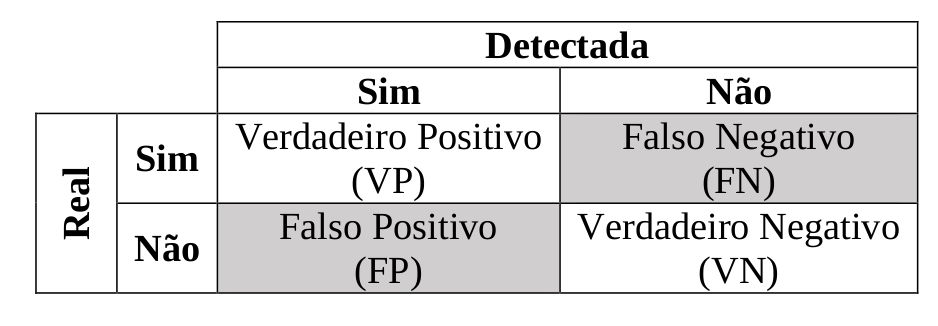

**Verdadeiros Positivos:** classificação correta da classe Positivo;

**Falsos Negativos:** erro em que o modelo previu a classe Negativo quando o valor real era classe Positivo;

**Falsos Positivos:** erro em que o modelo previu a classe Positivo quando o valor real era classe Negativo;

**Verdadeiros Negativos:** classificação correta da classe Negativo.

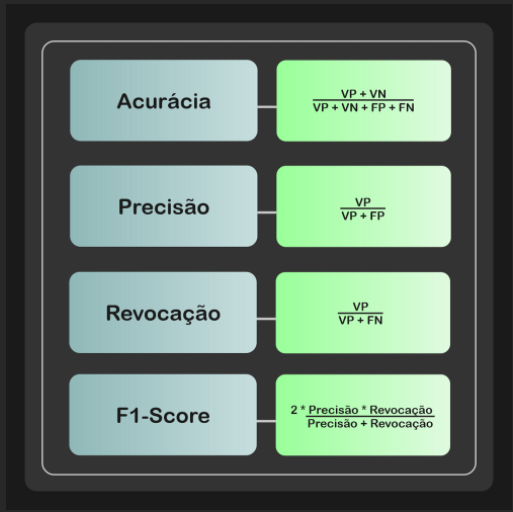

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))
# Resultado do classification_report:
# Acurácia: *indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente;
# Precisão: dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas;
# Recall/Revocação/Sensibilidade: *dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas;
# F1-Score: média harmônica entre precisão e recall.

In [ ]:
# Renderizando a árvore de forma gráfica:
!pip install ipywidgets
!pip3 install graphviz
!pip3 install pydot
import pydot
import graphviz

In [ ]:
dot_data = export_graphviz( 
         clf, 
         out_file=None,
         feature_names=dfTree.drop('isRight',axis=1).columns,
         class_names=['0','1'],  
         filled=True, rounded=True,
         proportion=True,
         node_ids=True,
         rotate=False,
         label='all',
         special_characters=True
        )  
graph = graphviz.Source(dot_data)  
graph

### **Como treinamos a árvore sem especificar nenhum parâmetro, ela cresceu de forma indefinida e ficou grande demais impossibilitando a visualização da mesma Agora vamos especificar alguns parâmetros e ver qual será o comportamento da árvore. **

In [ ]:
# Renderizando a árvore de forma interativa:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

# feature matrix
X,y = dfTree.drop('isRight',axis=1),dfTree['isRight']

# feature labels
features_label = dfTree.drop('isRight',axis=1).columns

# class label
class_label = ['0','1']


def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(X, y)
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , impurity=True
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,10,20,30]
   , min_samples_split=(1,5)
   , min_samples_leaf=(1,5))

display(inter)

##***Parâmetros do classificador DecisionTreeClassifier***

##***criterion:*** medida de qualidade da divisão, aqui que definimos qual dessas métricas (Indice Gini, Entropia) iremos usar.

##***splitter:*** estratégia utilizada para dividir o nó de decisão.

##***max_depth:*** profundidade máxima da árvore.

##***min_samples_split:*** número de amostras mínimas para considerar um nó para divisão.

##***min_samples_leaf:*** número de amostras mínimas no nível folha. 

In [ ]:
dfTree.head(1)

In [ ]:
# Visualizando as fronteiras criadas pela arvore:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

def visualize_fronteiras(msamples_split,max_depth):
    X = df[['tempoInteracao','task_Id']].values
    y = df.isRight.values
    clf = DecisionTreeClassifier(min_samples_split=msamples_split,max_depth=max_depth)
    tree = clf.fit(X, y)

    plt.figure(figsize=(16,9))
    plot_decision_regions(X, y, clf=tree, legend=2)

    plt.xlabel('tempoInteracao')
    plt.ylabel('task_Id')
    plt.title('Decision Tree')
    plt.show()

# Chamando a função criada anteriormente:
# 0 quadrado 1 triângulo
#2 amostras e 30 níveis de profundidade
visualize_fronteiras(2,max_depth=30)

In [ ]:
# Chamando a função criada anteriormente:
# 0 quadrado 1 triângulo
# 10 amostras e 8 níveis de profundidade
#Já nesse exemplo o nó precisa ter no mínimo 10 amostras para divisão e o nível de profundidade da árvore é igual a 8,ou seja, estamos controlando de forma mais rígida o crescimento da nossa árvore.
visualize_fronteiras(10,max_depth=8)

## ***Visualizando o caminho que a árvore tomou para chegar em uma determinada decisão***

In [ ]:
#Navegando na estrutura da arvore de decisão:
estimator = DecisionTreeClassifier(max_depth=3,min_samples_split=2,min_samples_leaf=2)
estimator.fit(X, y)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

print("Número de nós: {}".format(n_nodes))

# O print nos retorna o resultado abaixo:


In [ ]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("\nA arvore binária tem %s nós e a seguinte estrutura: \n"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snó=%s (nó folha)." % (node_depth[i] * "\t", i))
    else:
        print("%snó=%s (nó teste): vai para o nó %s se o valor do atributo %s <= %s \n se não, vai para o "
              "nó %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 dfTree.columns[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))

## ***Extraindo regras da arvore gerada a partir de uma determinada amostra dos dados***

In [ ]:
def extrai_regras(sample_id):
    node_indicator = estimator.decision_path(X)

    leave_id = estimator.apply(X)

    #sample_id = sample
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                        node_indicator.indptr[sample_id + 1]]

    print('\nFeatures usadas para predizer a amostra %s' % (sample_id))

    for f,v in zip(dfTree.columns,X.iloc[sample_id].values):
        print('%s = %s'%(f,v))

    print('\n')      
    for node_id in node_index:
        if leave_id[sample_id] == node_id:
            continue

        if (X.iloc[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("id do nó de decisão %s : (atributo %s com valor = %s %s %s)"
              % (node_id,
                 dfTree.columns[feature[node_id]],
                 X.iloc[sample_id, feature[node_id]],
                 threshold_sign,
                 threshold[node_id]))
        
    pred =estimator.predict(X.iloc[sample_id].values.reshape(1, -1))
    print(pred) 
    print("\tClasse => %s" %pred)

In [ ]:
print(metrics.classification_report(y_test,resultado))
# Resultado do classification_report:
# Acurácia: *indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente;
# Precisão: dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas;
# Recall/Revocação/Sensibilidade: *dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas;
# F1-Score: média harmônica entre precisão e recall.

In [ ]:
#retorna uma amostra de acordo com a árvore treinada
extrai_regras(1500)

In [ ]:
dfTree.query('1500')

In [ ]:
df_c = dfTree.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(df_c, annot=True)
plt.show()

#Algoritmo de agrupamento ***teste***

In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)
print(labels_true)


In [ ]:
# Carregando a base de dados:

dfGroup = pd.read_csv('/content/drive/Shareddrives/Mineração de Dados/expFinal.csv',sep=';',na_values= '?')
dfGroup.columns = ["idUsrCrsExp","userProfile_Id","discriminator","taskValidationDescription","course_Id","challenge_Id","task_Id","taskOrder","ordemTsk","isdone","isRight","startUsrCrsExp","startValid","tmpInicio","tmpFim","tempoInteracao"]
dfGroup.head()

In [ ]:
dfGroup = dfGroup[["course_Id","challenge_Id","task_Id","taskOrder","isdone","tempoInteracao"]]
dfGroup.head()

In [ ]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1],[-2,1]]
X, labels_true = make_blobs(n_samples=200, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

#Teste

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import squareform, pdist

In [ ]:
a = np.random.random_sample(size = 5)
b = np.random.random_sample(size = 5)

In [ ]:
point = ['P1','P2','P3','P4','P5']
data = pd.DataFrame({'Point':point, 'a':np.round(a,2), 'b':np.round(b,2)})
data = data.set_index('Point')
data

In [ ]:
dfGroup.head()

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(dfGroup['course_Id'], dfGroup['challenge_Id'], c='r', marker='*')
plt.xlabel('Column a')
plt.ylabel('column b')
plt.title('Scatter Plot of x and y')
for j in data.itertuples():
    plt.annotate(j.Index, (j.a, j.b), fontsize=15)

In [ ]:
dist = pd.DataFrame(squareform(pdist(dfGroup[['course_Id', 'challenge_Id']]), 'euclidean'), columns=dfGroup.index.values, index=dfGroup.index.values)